# Machine Learning Camp: HomeWork 7 Section 2 part3

# 3. COVID19 Time Series Data:
Download the data from [github link] (https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv)

The link above contains a time-series data for COVID-19 confirmed cases in the US. Limit the data to only use `New York State` and please answer the following questions:

In [10]:
import pandas as pd
import numpy as np
import numpy as geek
import seaborn as sns

### a. What is the total confirmed cases in Nebraska as of October 30th 2020 as per the dataset?

In [25]:
data = pd.read_csv("time_series_covid19_confirmed_US.csv")
data = data.drop(["UID",'iso2','iso3','code3','FIPS','Admin2','Combined_Key'],axis=1)
data.iloc[:,4:]= data.iloc[:,4:].diff(axis=1)
data.iloc[:,4].unique()
data = data.drop(["1/22/20"],axis=1)
data = pd.melt(data, id_vars=["Province_State","Country_Region","Lat","Long_"], 
        value_vars=None, var_name=None, value_name='value',
        col_level=None)
data.index = pd.to_datetime(data['variable'])
data = data.drop(["variable"],axis=1)
data.columns
data

,Province_State,Country_Region,Lat,Long_,value
variable,,,,,
2020-01-23,Alabama,US,32.539527,-86.644082,0
2020-01-23,Alabama,US,30.727750,-87.722071,0
2020-01-23,Alabama,US,31.868263,-85.387129,0
2020-01-23,Alabama,US,32.996421,-87.125115,0
2020-01-23,Alabama,US,33.982109,-86.567906,0
...,...,...,...,...,...
2022-12-19,Wyoming,US,43.935225,-110.589080,0
2022-12-19,Wyoming,US,41.287818,-110.547578,0
2022-12-19,Wyoming,US,0.000000,0.000000,0


In [26]:
a = data[(data['Province_State']=='Nebraska')]
a[a.index>pd.to_datetime("10-30-2020")].sum()[4]


479845

### b. On what date has the highest confirmed cases? Demonstrate using a suitable graph for all the available data.

In [27]:
b = data.nlargest(1,['value'])
b[["Province_State","Country_Region","value"]]

,Province_State,Country_Region,value
variable,,,
2022-01-04,Florida,US,150251


<AxesSubplot:xlabel='variable'>

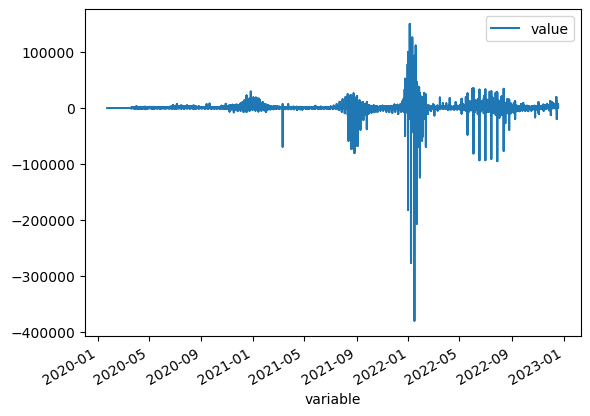

In [29]:
data.plot(y="value")

### c. Which County has the highest daily confirmed cases? Report both the County name and the date

### d. Identify two countries that have top total confirmed cases. Generate a time series plot of daily confirm cases for these two countries.

### e. Show the total confirmed cases for all the locations in an interactive world map (hint: you may use leaflet package in python.